In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os

from sklearn.metrics import classification_report

IMAGE_SIZE = [224, 224]

train_directory=r'C:\Users\VICTUS\Desktop\foreign\trainData'
test_directory = r'C:\Users\VICTUS\Desktop\foreign\testData'
val_directory=r'C:\Users\VICTUS\Desktop\foreign\valData'
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.1,
                                   zoom_range = 0.1,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.1,
                                   zoom_range = 0.1,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = IMAGE_SIZE,
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(val_directory,
                                            target_size = IMAGE_SIZE,
                                            batch_size = 64,
                                            class_mode = 'categorical')


foldersTrain = glob(r'C:\Users\VICTUS\Desktop\foreign\trainData\*')
#code section for adding the preprocessing layer on the top of VGG16 model
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#loop to set the existing weight to non-trainable
for layer in vgg.layers:
  layer.trainable = False
#code to flatten the VGG output
x = Flatten()(vgg.output)
#code to add Dense the layer
prediction = Dense(len(foldersTrain), activation='softmax')(x)


  # useful for getting number of classes
foldersTrain = glob(r'C:\Users\VICTUS\Desktop\foreign\trainData\*')
foldersTest = glob(r'C:\Users\VICTUS\Desktop\foreign\testData\*')
foldersVal = glob(r'C:\Users\VICTUS\Desktop\foreign\valData\*')
folder_count1 = len(foldersTrain)
folder_count2 = len(foldersTest)
folder_count3 = len(foldersVal)
print(folder_count1)
print(folder_count2)
print(folder_count3)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

x = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Found 9198 images belonging to 46 classes.
Found 1216 images belonging to 46 classes.
46
46
46
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_27968\4151637176.py:75: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  x = model.fit_generator(


Epoch 1/5
144/144 [==============================] - 951s 7s/step - loss: 0.2654 - accuracy: 0.9455 - val_loss: 0.5911 - val_accuracy: 0.8413
Epoch 2/5
144/144 [==============================] - 931s 6s/step - loss: 0.0054 - accuracy: 0.9997 - val_loss: 0.5765 - val_accuracy: 0.8635
Epoch 3/5
144/144 [==============================] - 867s 6s/step - loss: 0.0028 - accuracy: 0.9999 - val_loss: 0.4947 - val_accuracy: 0.8750
Epoch 4/5
144/144 [==============================] - 865s 6s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.5230 - val_accuracy: 0.8660
Epoch 5/5
144/144 [==============================] - 911s 6s/step - loss: 9.9837e-04 - accuracy: 1.0000 - val_loss: 0.5227 - val_accuracy: 0.8610


In [2]:
test_predictions = model.predict(test_set)
# Convert predictions to class labels
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Get true labels
true_labels = test_set.classes

# Generate classification report
class_report = classification_report(true_labels, test_predicted_labels)
print('Classification Report:')
print(class_report)

19/19 [==============================] - 102s 5s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.04      0.03      0.04        30
           2       0.05      0.05      0.05        21
           3       0.00      0.00      0.00        28
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        21
           6       0.06      0.05      0.05        21
           7       0.00      0.00      0.00        21
           8       0.04      0.05      0.04        21
           9       0.00      0.00      0.00        21
          10       0.05      0.11      0.07        28
          11       0.00      0.00      0.00        28
          12       0.04      0.04      0.04        28
          13       0.00      0.00      0.00        28
          14       0.00      0.00      0.00        28
          15       0.02      0.07      0.03        28
    

In [1]:
import os
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator

# Set the paths to your train, test, and validation directories
train_directory = r'C:\Users\VICTUS\Desktop\foreign\trainData'
test_directory = r'C:\Users\VICTUS\Desktop\foreign\testData'
val_directory = r'C:\Users\VICTUS\Desktop\foreign\valData'

# Input image dimensions and other hyperparameters
input_shape = (150, 150, 3)
batch_size = 128
epochs = 3

# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Normalization for the test and validation sets
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load and prepare the training data
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load and prepare the validation data
val_generator = test_datagen.flow_from_directory(
    val_directory,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the pre-trained VGG16 model (without the top classification layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Create the model by adding custom top layers
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Freeze the pre-trained layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
x = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)



Found 19408 images belonging to 46 classes.
Found 1216 images belonging to 46 classes.
Epoch 1/3
151/151 [==============================] - 769s 5s/step - loss: 0.2513 - accuracy: 0.9544 - val_loss: 0.5439 - val_accuracy: 0.8333
Epoch 2/3
151/151 [==============================] - 778s 5s/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.4502 - val_accuracy: 0.8976
Epoch 3/3
151/151 [==============================] - 700s 5s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3991 - val_accuracy: 0.9028


In [12]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming you have already defined the test_set and test_predictions
test_set = test_datagen.flow_from_directory(val_directory,
                                            target_size=(150, 150),  # Update this to match the input shape of your model
                                            batch_size=64,
                                            class_mode='categorical')

test_predictions = model.predict(test_set)

# Convert predictions to class labels
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Get true labels as 1D array
true_labels = test_set.classes.ravel()

# Generate classification report
class_report = classification_report(true_labels, test_predicted_labels)
print('Classification Report:')
print(class_report)


Found 1216 images belonging to 46 classes.
19/19 [==============================] - 49s 3s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.07      0.07      0.07        30
           2       0.05      0.05      0.05        21
           3       0.07      0.07      0.07        28
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        21
           6       0.00      0.00      0.00        21
           7       0.05      0.05      0.05        21
           8       0.00      0.00      0.00        21
           9       0.00      0.00      0.00        21
          10       0.00      0.00      0.00        28
          11       0.04      0.04      0.04        28
          12       0.00      0.00      0.00        28
          13       0.04      0.04      0.04        28
          14       0.04      0.04      0.04        28
          15    

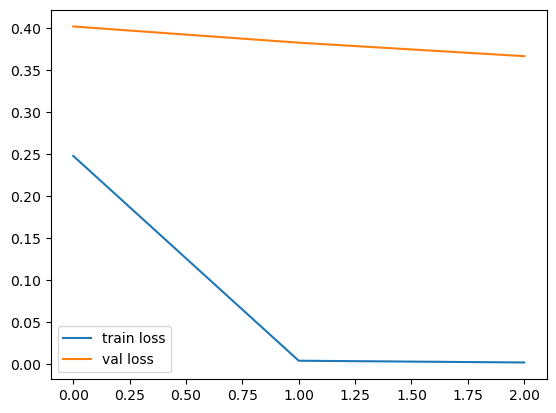

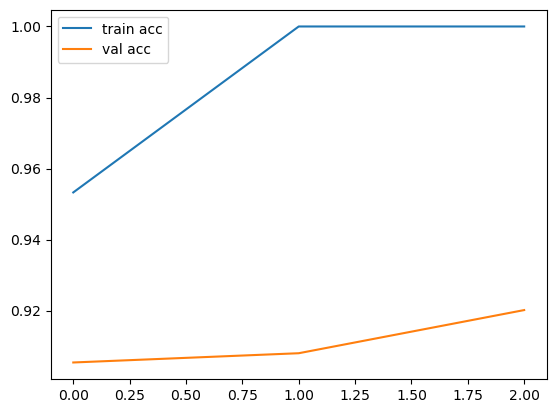

In [13]:
import matplotlib.pyplot as plt
# loss
plt.plot(x.history['loss'], label='train loss')
plt.plot(x.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(x.history['accuracy'], label='train acc')
plt.plot(x.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

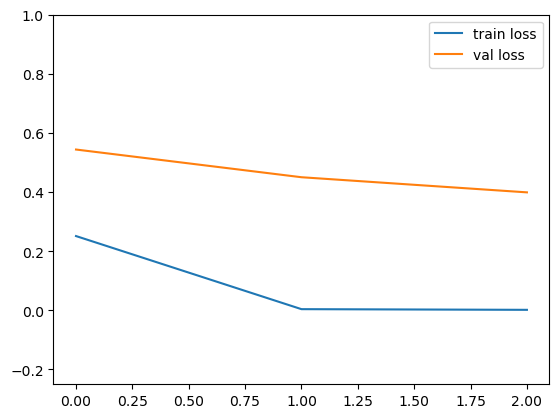

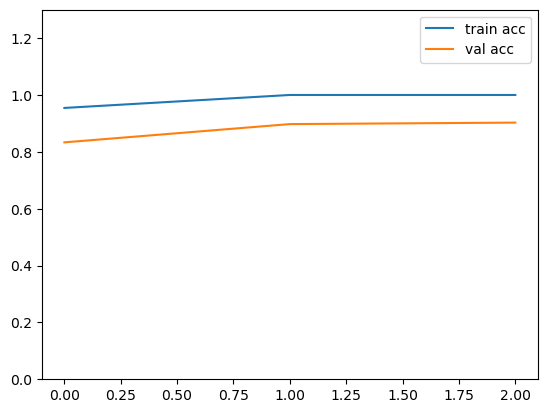

In [14]:
import matplotlib.pyplot as plt

# Your code for defining x (assuming it's a history object)

# Plotting loss
plt.plot(x.history['loss'], label='train loss')
plt.plot(x.history['val_loss'], label='val loss')
plt.legend()

# Set the y-axis limits for loss plot (adjust these values based on your preference)
plt.ylim(-0.25, 1.0)

plt.show()

# Plotting accuracies
plt.plot(x.history['accuracy'], label='train acc')
plt.plot(x.history['val_accuracy'], label='val acc')
plt.legend()

# Set the y-axis limits for accuracy plot (adjust these values based on your preference)
plt.ylim(0, 1.3)

plt.show()
